In [1]:
import cv2
import numpy as np
# import textwrap

### Display image use
from PIL import Image
from IPython.display import display

In [2]:
# 'item':[quantity, unit price]

stuffs = {'Apple':[1, 50], 'Banana':[3, 20], 'TESTTTT':[3, 20], 'TesttheLongItemNameWillBeLookLike':[3, 20], 'Chikweok':[10, 20]}

height: 743 | width: 1000 | channels: 3
total_height 260 price_y2 = 240


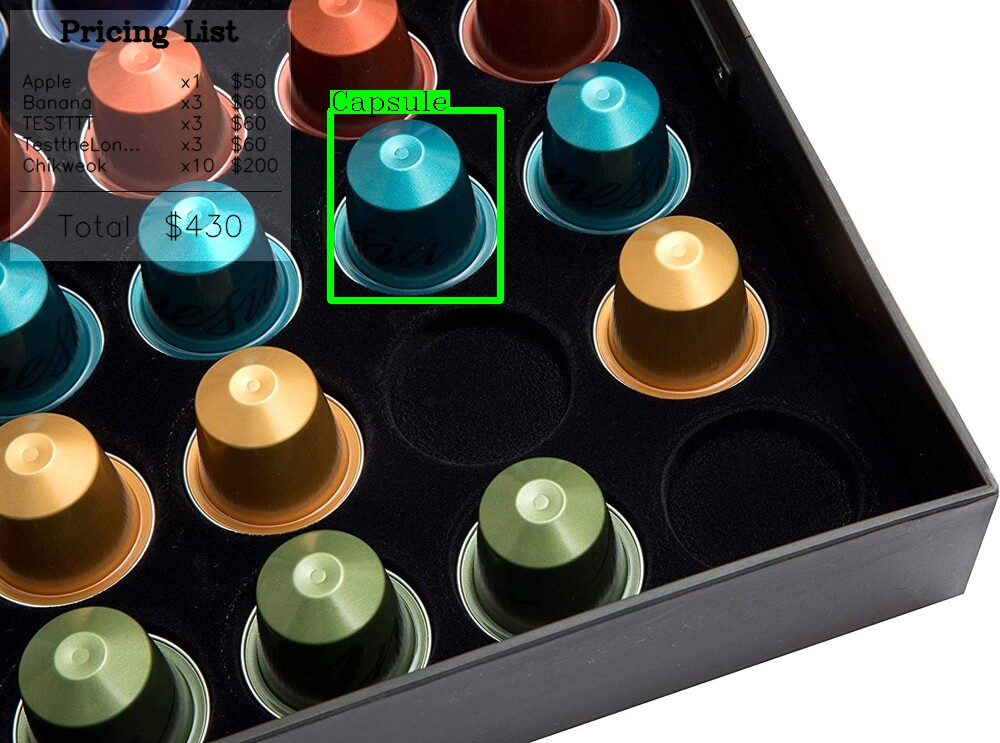

In [3]:
img = cv2.imread('example.jpg')
height, width, channels = img.shape
print("height:", height, "| width:", width, "| channels:", channels)

# --------------------------------
### Object parts.
label = 'Capsule' 
x1 = 330 
y1 = 110
x2 = 500
y2 = 300
cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 6)
font = fontFace = cv2.FONT_HERSHEY_COMPLEX
fontScale = 0.9
thickness = 1
labelSize = cv2.getTextSize(label, fontFace, fontScale, thickness)
_x1 = x1 # bottomleft x of text
_y1 = y1 # bottomleft y of text
_x2 = x1+labelSize[0][0] # topright x of text
_y2 = y1-labelSize[0][1] # topright y of text
cv2.rectangle(img, (_x1,_y1), (_x2,_y2), (0,255,0), cv2.FILLED) # text background
cv2.putText(img, label, (x1,y1), fontFace, fontScale, (0,0,0), thickness)

# --------------------------------
### Price area.
#### Background
price_x1 = price_y1 = int(10)
price_x2 = price_x1 + 280
price_y2 = total_height = 14*len(stuffs) + 190
print("total_height", total_height, "price_y2 = 240")
# price_y2 = 240
zeros1 = np.zeros((img.shape), dtype=np.uint8)
zeros_mask1 = cv2.rectangle(zeros1, (price_x1, price_y1), (price_x2, price_y2),
                    color=(255,255,255), thickness=-1 )

alpha = 1
beta = 0.2
gamma = 0        
img = cv2.addWeighted(img, alpha, zeros_mask1, beta, gamma)

### Title
price_list_label = 'Pricing List' 
price_list_labelSize = cv2.getTextSize(price_list_label, fontFace, fontScale, thickness)
font_size = 0.9
font_thickness = 2
cv2.putText(img, price_list_label, (price_x1+50, price_y1+30), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)

### Each item
#### we need to prepare the words for writing use.
wrapped_text = []
word_limit = 10
total_price = 0
for i in stuffs:
    name_len = len(i)
    
    if name_len > word_limit:
        new_item_name = i[:word_limit] + '...' 
    else:
        new_item_name = i + ' '*(word_limit - name_len + 3)
    price_item = stuffs[i][0] * stuffs[i][1]
    total_price += price_item
#     new_item_name = new_item_name + ' x'+str(stuffs[i][0]) + '  $' + str(price_item)
#     wrapped_text.append(new_item_name)
    wrapped_text.append([new_item_name, 'x'+str(stuffs[i][0]), '$' + str(price_item)])
# print(wrapped_text)

### wrap part
x, y = (price_x1+12), (price_y1 + 30 + price_list_labelSize[0][1])

for i, line in enumerate(wrapped_text):
#     print("len", len(line))
#     textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
#     print(">>> line: ", line, " | textsize: ", textsize)
#     gap = 5 #textsize[1]
#     print("i * gap", i * gap, " | textsize[1]", textsize[1])
    
#     y = int((y + textsize[1])) + 7 #i * gap
#     print("Final y", y)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     font_size = 0.6
#     font_thickness = 1
#     cv2.putText(img, line, (x, y), font,
#                 font_size, 
#                 (0,0,0), 
#                 font_thickness, 
#                 lineType = cv2.LINE_AA)
    
    ### Class object
    textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
    y = int((y + textsize[1])) + 7
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 0.6
    font_thickness = 1
    cv2.putText(img, line[0], (x, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    
    ### Quantity
    x_quantity = 180 
    cv2.putText(img, line[1], (x_quantity, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    
    ### Unit price
    x_price = 230 
    cv2.putText(img, line[2], (x_price, y), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)
    

## line
y_line = y+20
cv2.line(img, (x-3, y_line), (price_x2 - (x-3-price_x1), y_line), (0, 0, 0), 1)

## Total price
total_price_word = 'Total  ${}'.format(total_price)
font_size = 1
font_thickness = 1
y_total_price = y_line + 45
x_total_price = x + 35
cv2.putText(img, total_price_word, (x_total_price, y_total_price), font,
                font_size, 
                (0,0,0), 
                font_thickness, 
                lineType = cv2.LINE_AA)

cv2.imwrite("result.jpg", img)


from IPython.display import Image 
pil_img = Image(filename='result.jpg')
display(pil_img)

height: 743 | width: 1000 | channels: 3
total_height 260 price_y2 = 240


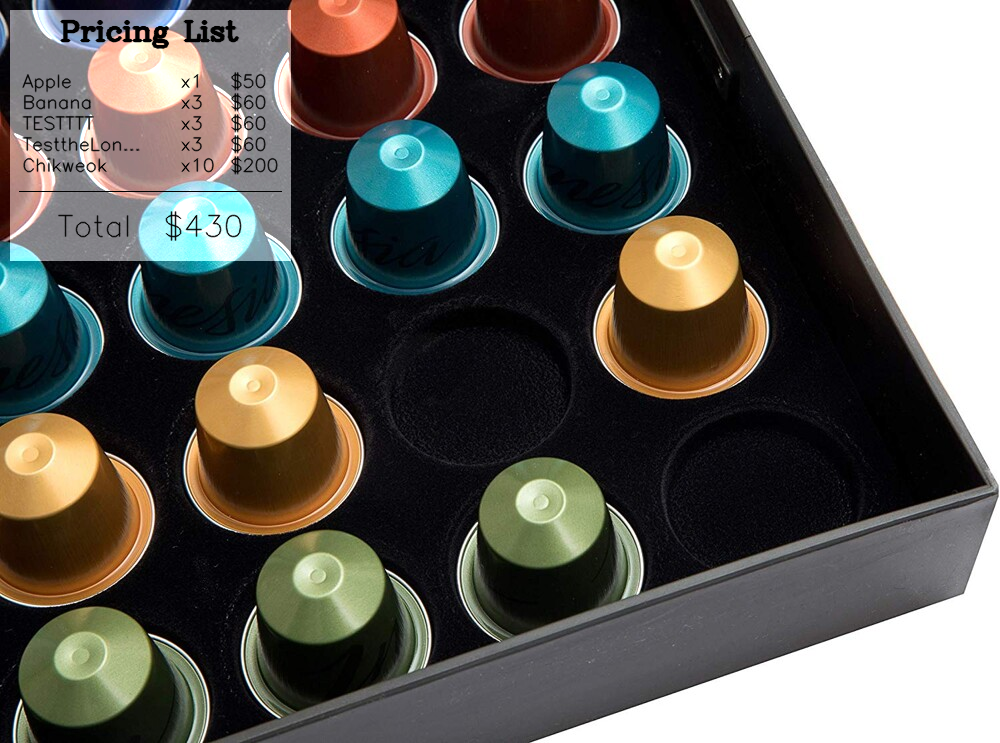

In [4]:
def calculating_prices(ori_img, stuffs):
    """
    # 'item':[quantity, unit price]
    stuffs = {'Apple':[1, 50], 'Banana':[3, 20], 'testtt':[3, 20], 'TesttheLongItemNameWillBeLookLike':[3, 20], 'Chikweok':[10, 20]}
    """
    # img = cv2.imread('example.jpg')
    height, width, channels = ori_img.shape
    print("height:", height, "| width:", width, "| channels:", channels)

    # --------------------------------
    ### Price area.
    #### Background
    price_x1 = price_y1 = int(10)
    price_x2 = price_x1 + 280
    price_y2 = total_height = 14*len(stuffs) + 190
    print("total_height", total_height, "price_y2 = 240")
    # price_y2 = 240
    zeros1 = np.zeros((ori_img.shape), dtype=np.uint8)
    zeros_mask1 = cv2.rectangle(zeros1, (price_x1, price_y1), (price_x2, price_y2),
                        color=(255,255,255), thickness=-1 )

    alpha = 1
    beta = 0.5
    gamma = 0        
    img = cv2.addWeighted(ori_img, alpha, zeros_mask1, beta, gamma)

    ### Title
    price_list_label = 'Pricing List' 
    font = fontFace = cv2.FONT_HERSHEY_COMPLEX
    fontScale = 0.9
    thickness = 1
    price_list_labelSize = cv2.getTextSize(price_list_label, fontFace, fontScale, thickness)
    font_size = 0.9
    font_thickness = 2
    cv2.putText(img, price_list_label, (price_x1+50, price_y1+30), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)

    ### Each item
    #### we need to prepare the words for writing use.
    wrapped_text = []
    word_limit = 10
    total_price = 0
    for i in stuffs:
        name_len = len(i)
        
        if name_len > word_limit:
            new_item_name = i[:word_limit] + '...' 
        else:
            new_item_name = i + ' '*(word_limit - name_len + 3)
        price_item = stuffs[i][0] * stuffs[i][1]
        total_price += price_item
    #     new_item_name = new_item_name + ' x'+str(stuffs[i][0]) + '  $' + str(price_item)
    #     wrapped_text.append(new_item_name)
        wrapped_text.append([new_item_name, 'x'+str(stuffs[i][0]), '$' + str(price_item)])
    # print(wrapped_text)

    ### wrap part
    x, y = (price_x1+12), (price_y1 + 30 + price_list_labelSize[0][1])

    for i, line in enumerate(wrapped_text):
    #     print("len", len(line))
    #     textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
    #     print(">>> line: ", line, " | textsize: ", textsize)
    #     gap = 5 #textsize[1]
    #     print("i * gap", i * gap, " | textsize[1]", textsize[1])
        
    #     y = int((y + textsize[1])) + 7 #i * gap
    #     print("Final y", y)
    #     font = cv2.FONT_HERSHEY_SIMPLEX
    #     font_size = 0.6
    #     font_thickness = 1
    #     cv2.putText(img, line, (x, y), font,
    #                 font_size, 
    #                 (0,0,0), 
    #                 font_thickness, 
    #                 lineType = cv2.LINE_AA)
        
        ### Class object
        textsize = cv2.getTextSize(line[0], font, font_size, font_thickness)[0]
        y = int((y + textsize[1])) + 7
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_size = 0.6
        font_thickness = 1
        cv2.putText(img, line[0], (x, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Quantity
        x_quantity = 180 
        cv2.putText(img, line[1], (x_quantity, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        
        ### Unit price
        x_price = 230 
        cv2.putText(img, line[2], (x_price, y), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
        

    ## line
    y_line = y+20
    cv2.line(img, (x-3, y_line), (price_x2 - (x-3-price_x1), y_line), (0, 0, 0), 1)

    ## Total price
    total_price_word = 'Total  ${}'.format(total_price)
    font_size = 1
    font_thickness = 1
    y_total_price = y_line + 45
    x_total_price = x + 35
    cv2.putText(img, total_price_word, (x_total_price, y_total_price), font,
                    font_size, 
                    (0,0,0), 
                    font_thickness, 
                    lineType = cv2.LINE_AA)
    return img

img = cv2.imread('example.jpg')

masked_image = calculating_prices(img, stuffs) 

### Display image use
from PIL import Image
from IPython.display import display
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(masked_image))